In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('googleplaystore(in).csv')


In [2]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape

(10841, 13)

In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data['Rating'].median()

4.3

In [8]:
data['Rating'].fillna(data['Rating'].median(), inplace=True)

In [9]:
def clean_reviews(val):
    try:
        val = str(val).strip()
        if val.endswith('M'):
            return float(val.replace('M', '')) * 1_000_000
        elif val.endswith('k') or val.endswith('K'):
            return float(val.replace('k', '').replace('K', '')) * 1_000
        elif val.replace('.', '', 1).isdigit():
            return float(val)
        else:
            return np.nan
    except:
        return np.nan

data['Reviews'] = data['Reviews'].apply(clean_reviews)

unique_reviews = data['Reviews'].unique()

print(sorted(unique_reviews))

In [10]:
def convert_size(size):
    if isinstance(size, str):
        size = size.strip().replace(',', '').replace('+', '')
        if size == 'Varies with device':
            return None
        elif size[-1].upper() == 'M':
            return float(size[:-1]) * 1000000
        elif size[-1].upper() == 'K':
            return float(size[:-1]) * 1000
        else:
            try:
                return float(size)
            except ValueError:
                return None
    return None
data['Size'] = data['Size'].apply(convert_size)


In [11]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [13]:
data['Size'].mean()

21514177.07194402

In [14]:
data['Size'].median()

13000000.0

In [15]:
data['Size'].fillna(data['Size'].median(), inplace=True)

In [16]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [17]:
import numpy as np
# Step 1: Clean 'Installs' column
def clean_installs(val):
    try:
        val = str(val).replace(',', '').replace('+', '').strip()
        return int(val)
    except:
        return np.nan  # or np.nan

data['Installs'] = data['Installs'].apply(clean_installs)
# Step 3: Ensure float type
data['Installs'] = data['Installs'].astype(float)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [19]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          1
Type              1
Price             0
Content_Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [20]:
data = data.dropna(subset=['Installs', 'Type','Content_Rating'])


In [21]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [22]:
# Step 2: Encode 'Type' as binary (Free = 0, Paid = 1)
data['Type'] = data['Type'].map({'Free': 0, 'Paid': 1})


In [23]:
data['Type'].unique()

array([0, 1], dtype=int64)

In [24]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  float64
 6   Type            10839 non-null  int64  
 7   Price           10839 non-null  object 
 8   Content_Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


In [26]:
# Step 1: Remove "$" and convert to float
def clean_price(price):
    try:
        return float(str(price).replace('$', '').strip())
    except:
        return pd.NA

data['Price'] = data['Price'].apply(clean_price)
# Step 4: Convert to float (in case it's still object)
data['Price'] = data['Price'].astype(float)


In [27]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [28]:

# Step 1: Clean 'Category' column
data['Category'] = data['Category'].astype(str).str.replace('_', ' ').str.title()

# Step 2: Clean 'Genres' column
# Replace underscores, title-case
data['Genres'] = data['Genres'].astype(str).str.replace('_', ' ').str.title()

In [29]:
# Convert 'Last Updated' to number of days since the most recent update
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')
latest_date = data['Last Updated'].max()
data['Last Updated'] = (latest_date - data['Last Updated']).dt.days


In [30]:
def extract_main_version(ver):
    ver = str(ver)
    parts = ver.split('.')
    major = parts[0] if len(parts) > 0 else '0'
    minor = parts[1] if len(parts) > 1 else '0'
    try:
        return float(f"{major}.{minor}")
    except:
        return 0.0
data['Current Ver'] = data['Current Ver'].apply(extract_main_version)


In [31]:
import numpy as np
import re

def extract_android_version(ver):
    if pd.isna(ver) or 'Varies' in str(ver):
        return 0.0  # Or np.nan if you prefer to keep missing
    ver = str(ver).split(' ')[0]  # Remove 'and up' or similar text
    ver = re.sub(r'[^0-9\.]', '', ver)  # Remove non-numeric characters like 'W'
    parts = ver.split('.')
    major = parts[0] if len(parts) > 0 else '0'
    minor = parts[1] if len(parts) > 1 else '0'
    return float(f"{major}.{minor}")

# Apply the cleaning function
data['Android Ver'] = data['Android Ver'].apply(extract_android_version)

# Check results
print(data['Android Ver'].unique())
print(data['Android Ver'].dtype)


[4.  4.2 4.4 2.3 3.  4.1 0.  2.2 5.  6.  1.6 1.5 2.1 7.  5.1 4.3 2.  3.2
 7.1 8.  3.1 1. ]
float64


data = data.drop(['Last Updated','Current Ver','Android Ver'], axis=1)

In [32]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [33]:
data['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone_10+', 'Mature_17+',
       'Adults_only_18+', 'Unrated'], dtype=object)

In [34]:
# Drop exact duplicate rows
data.drop_duplicates(inplace=True)

# Confirm duplicates have been removed
remaining_duplicates = data.duplicated().sum()
cleaned_shape = data.shape

remaining_duplicates, cleaned_shape


(0, (10356, 13))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          10356 non-null  float64
 3   Reviews         10356 non-null  float64
 4   Size            10356 non-null  float64
 5   Installs        10356 non-null  float64
 6   Type            10356 non-null  int64  
 7   Price           10356 non-null  float64
 8   Content_Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  int64  
 11  Current Ver     10356 non-null  float64
 12  Android Ver     10356 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.1+ MB


In [36]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,213,1.00,4.0
1,Coloring book moana,Art And Design,3.9,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design Pretend Play,205,2.00,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,7,1.20,4.0
3,Sketch - Draw & Paint,Art And Design,4.5,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,61,0.00,4.2
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design Creativity,49,1.10,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53000000.0,5000.0,0,0.0,Everyone,Education,379,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3600000.0,100.0,0,0.0,Everyone,Education,33,1.00,4.1
10838,Parkinson Exercices FR,Medical,4.3,3.0,9500000.0,1000.0,0,0.0,Everyone,Medical,565,1.00,2.2
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114.0,13000000.0,1000.0,0,0.0,Mature_17+,Books & Reference,1297,0.00,0.0


In [37]:
# Replace 'column_name' with the actual column name you want to drop
data.drop("App", axis=1, inplace=True)
  

In [38]:
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Art And Design,4.1,159.0,19000000.0,10000.0,0,0.0,Everyone,Art & Design,213,1.00,4.0
1,Art And Design,3.9,967.0,14000000.0,500000.0,0,0.0,Everyone,Art & Design Pretend Play,205,2.00,4.0
2,Art And Design,4.7,87510.0,8700000.0,5000000.0,0,0.0,Everyone,Art & Design,7,1.20,4.0
3,Art And Design,4.5,215644.0,25000000.0,50000000.0,0,0.0,Teen,Art & Design,61,0.00,4.2
4,Art And Design,4.3,967.0,2800000.0,100000.0,0,0.0,Everyone,Art & Design Creativity,49,1.10,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Family,4.5,38.0,53000000.0,5000.0,0,0.0,Everyone,Education,379,1.48,4.1
10837,Family,5.0,4.0,3600000.0,100.0,0,0.0,Everyone,Education,33,1.00,4.1
10838,Medical,4.3,3.0,9500000.0,1000.0,0,0.0,Everyone,Medical,565,1.00,2.2
10839,Books And Reference,4.5,114.0,13000000.0,1000.0,0,0.0,Mature_17+,Books & Reference,1297,0.00,0.0


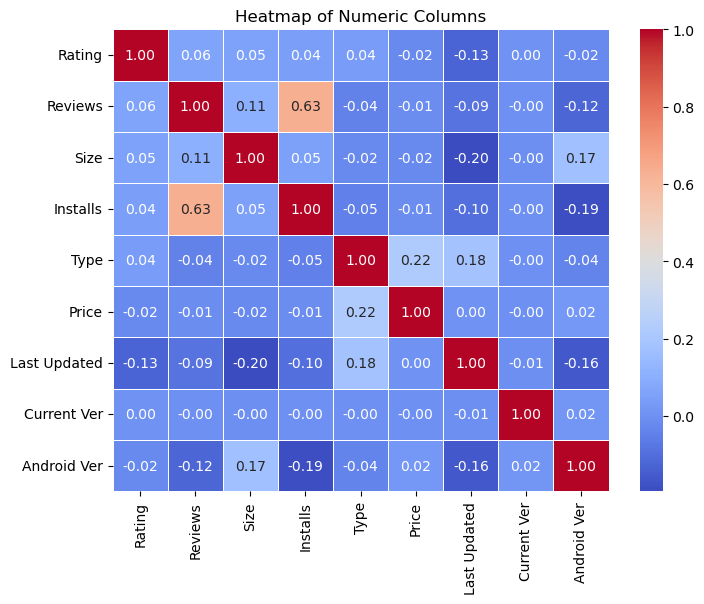

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numeric Columns")
plt.show()


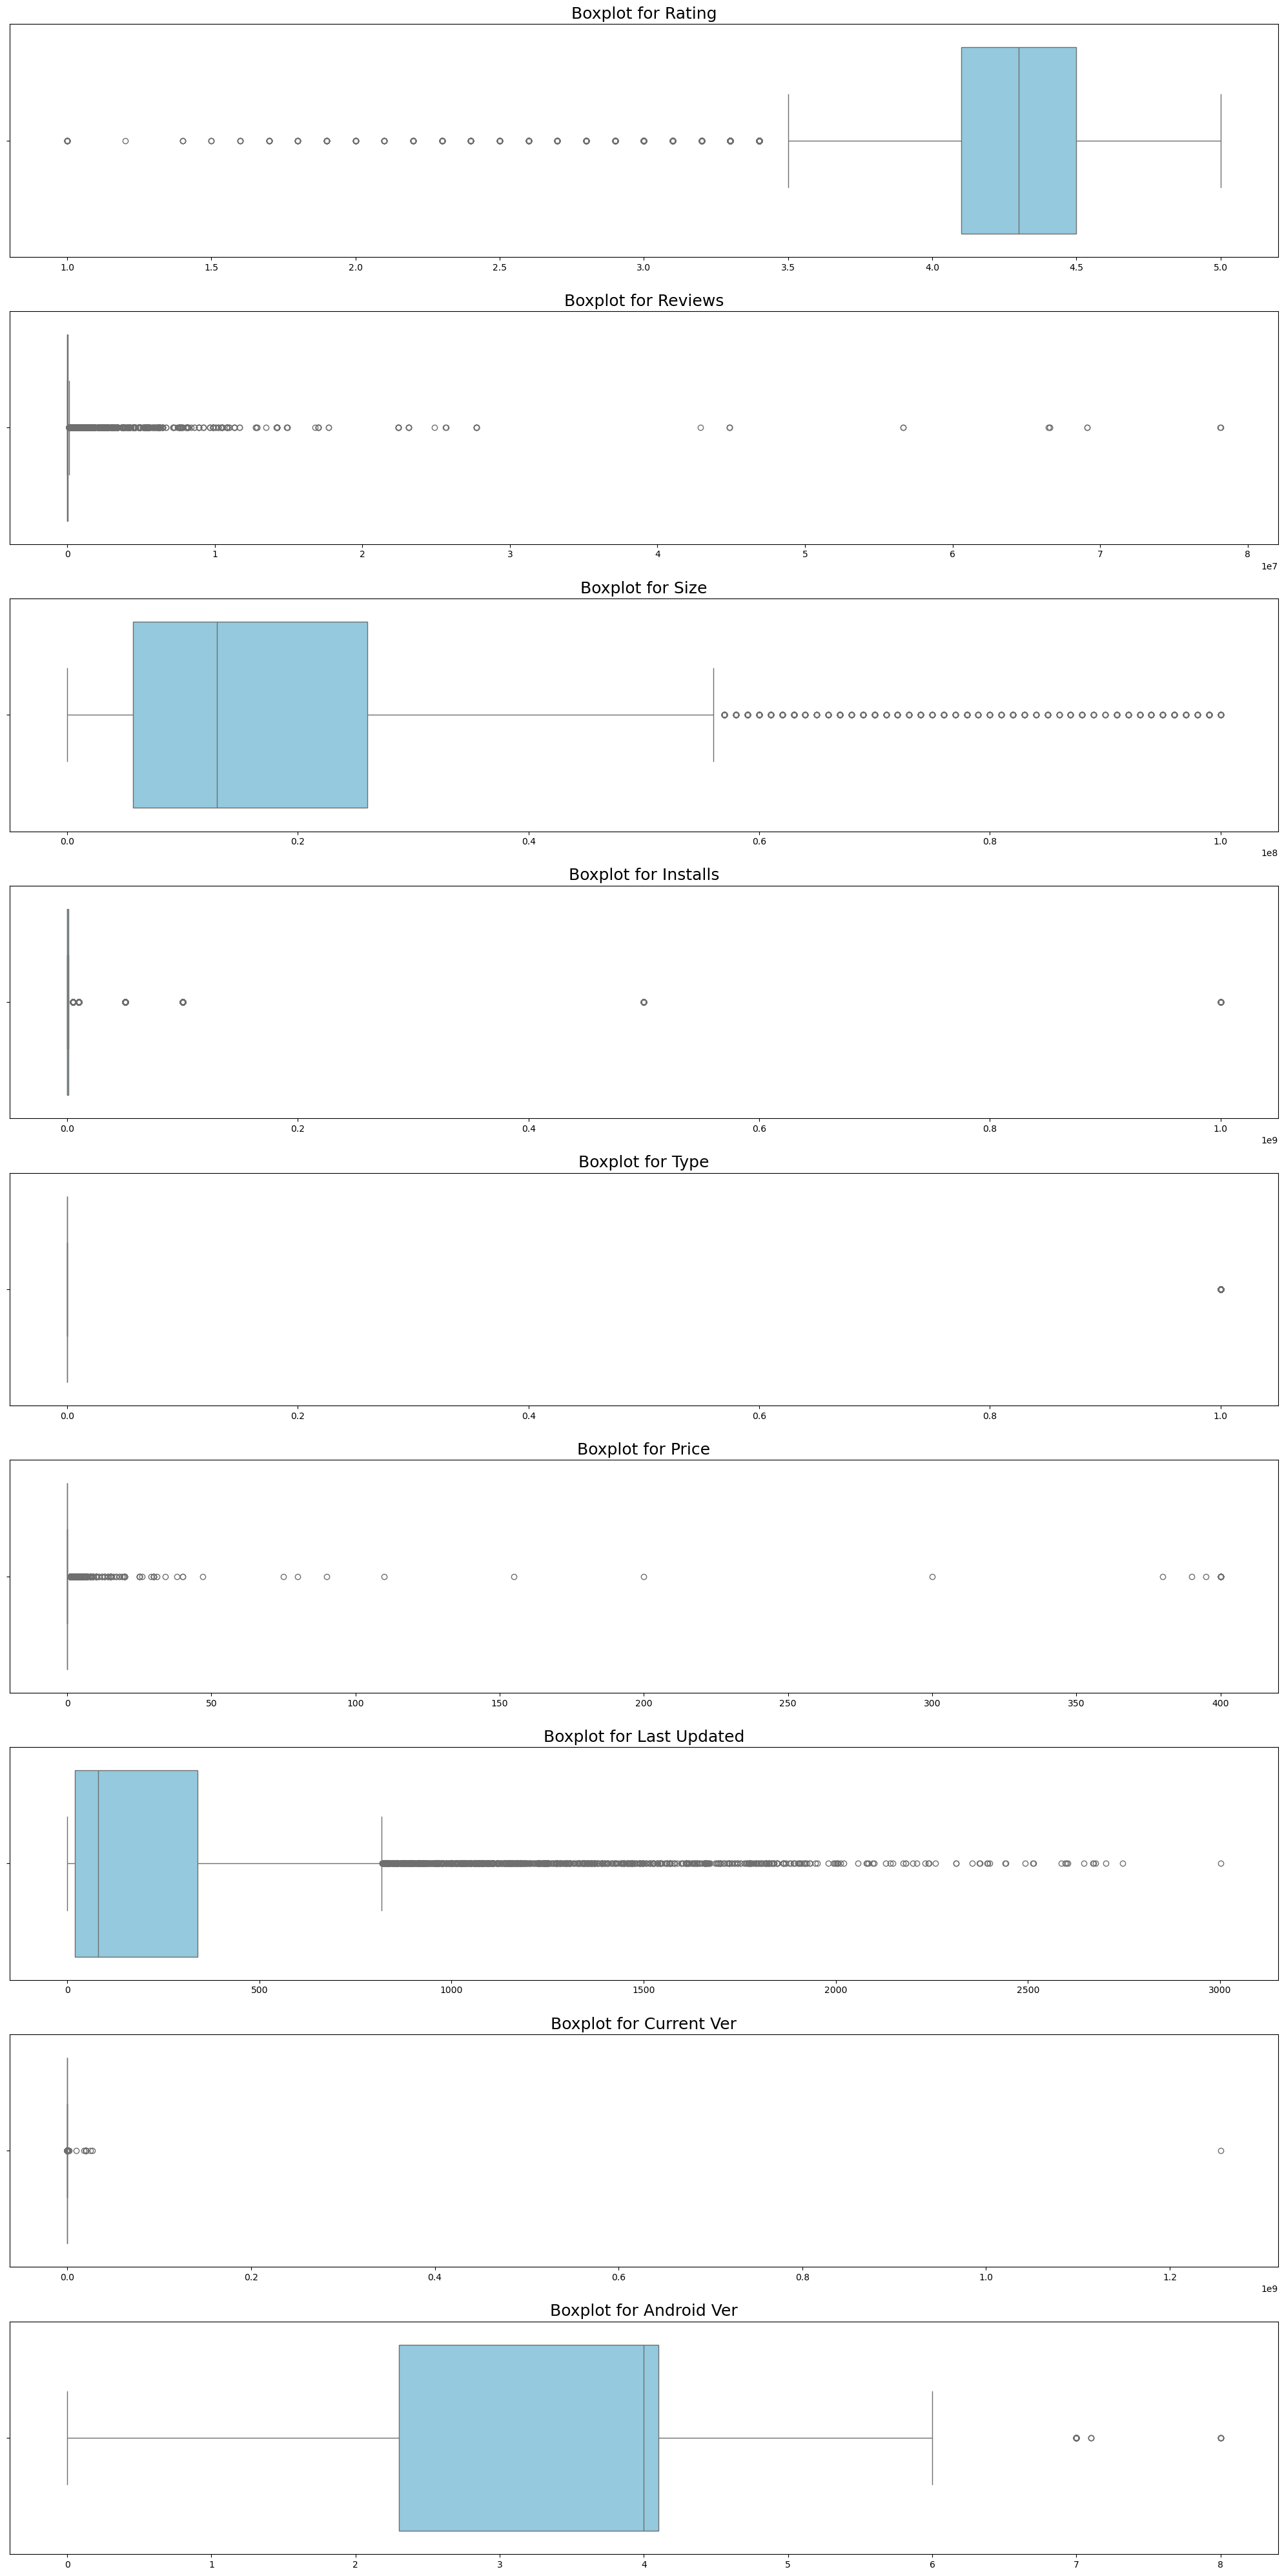

In [40]:
# Plotting the boxplot for the entire dataset
numeric_columns = data.select_dtypes(include='number').columns

plt.figure(figsize=(20, 40))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=18)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [41]:
# Treating outliers for all numerical columns
for column in data.select_dtypes(include=np.number).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replacing outliers with the upper or lower bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

print("Outliers treated successfully.")

Outliers treated successfully.


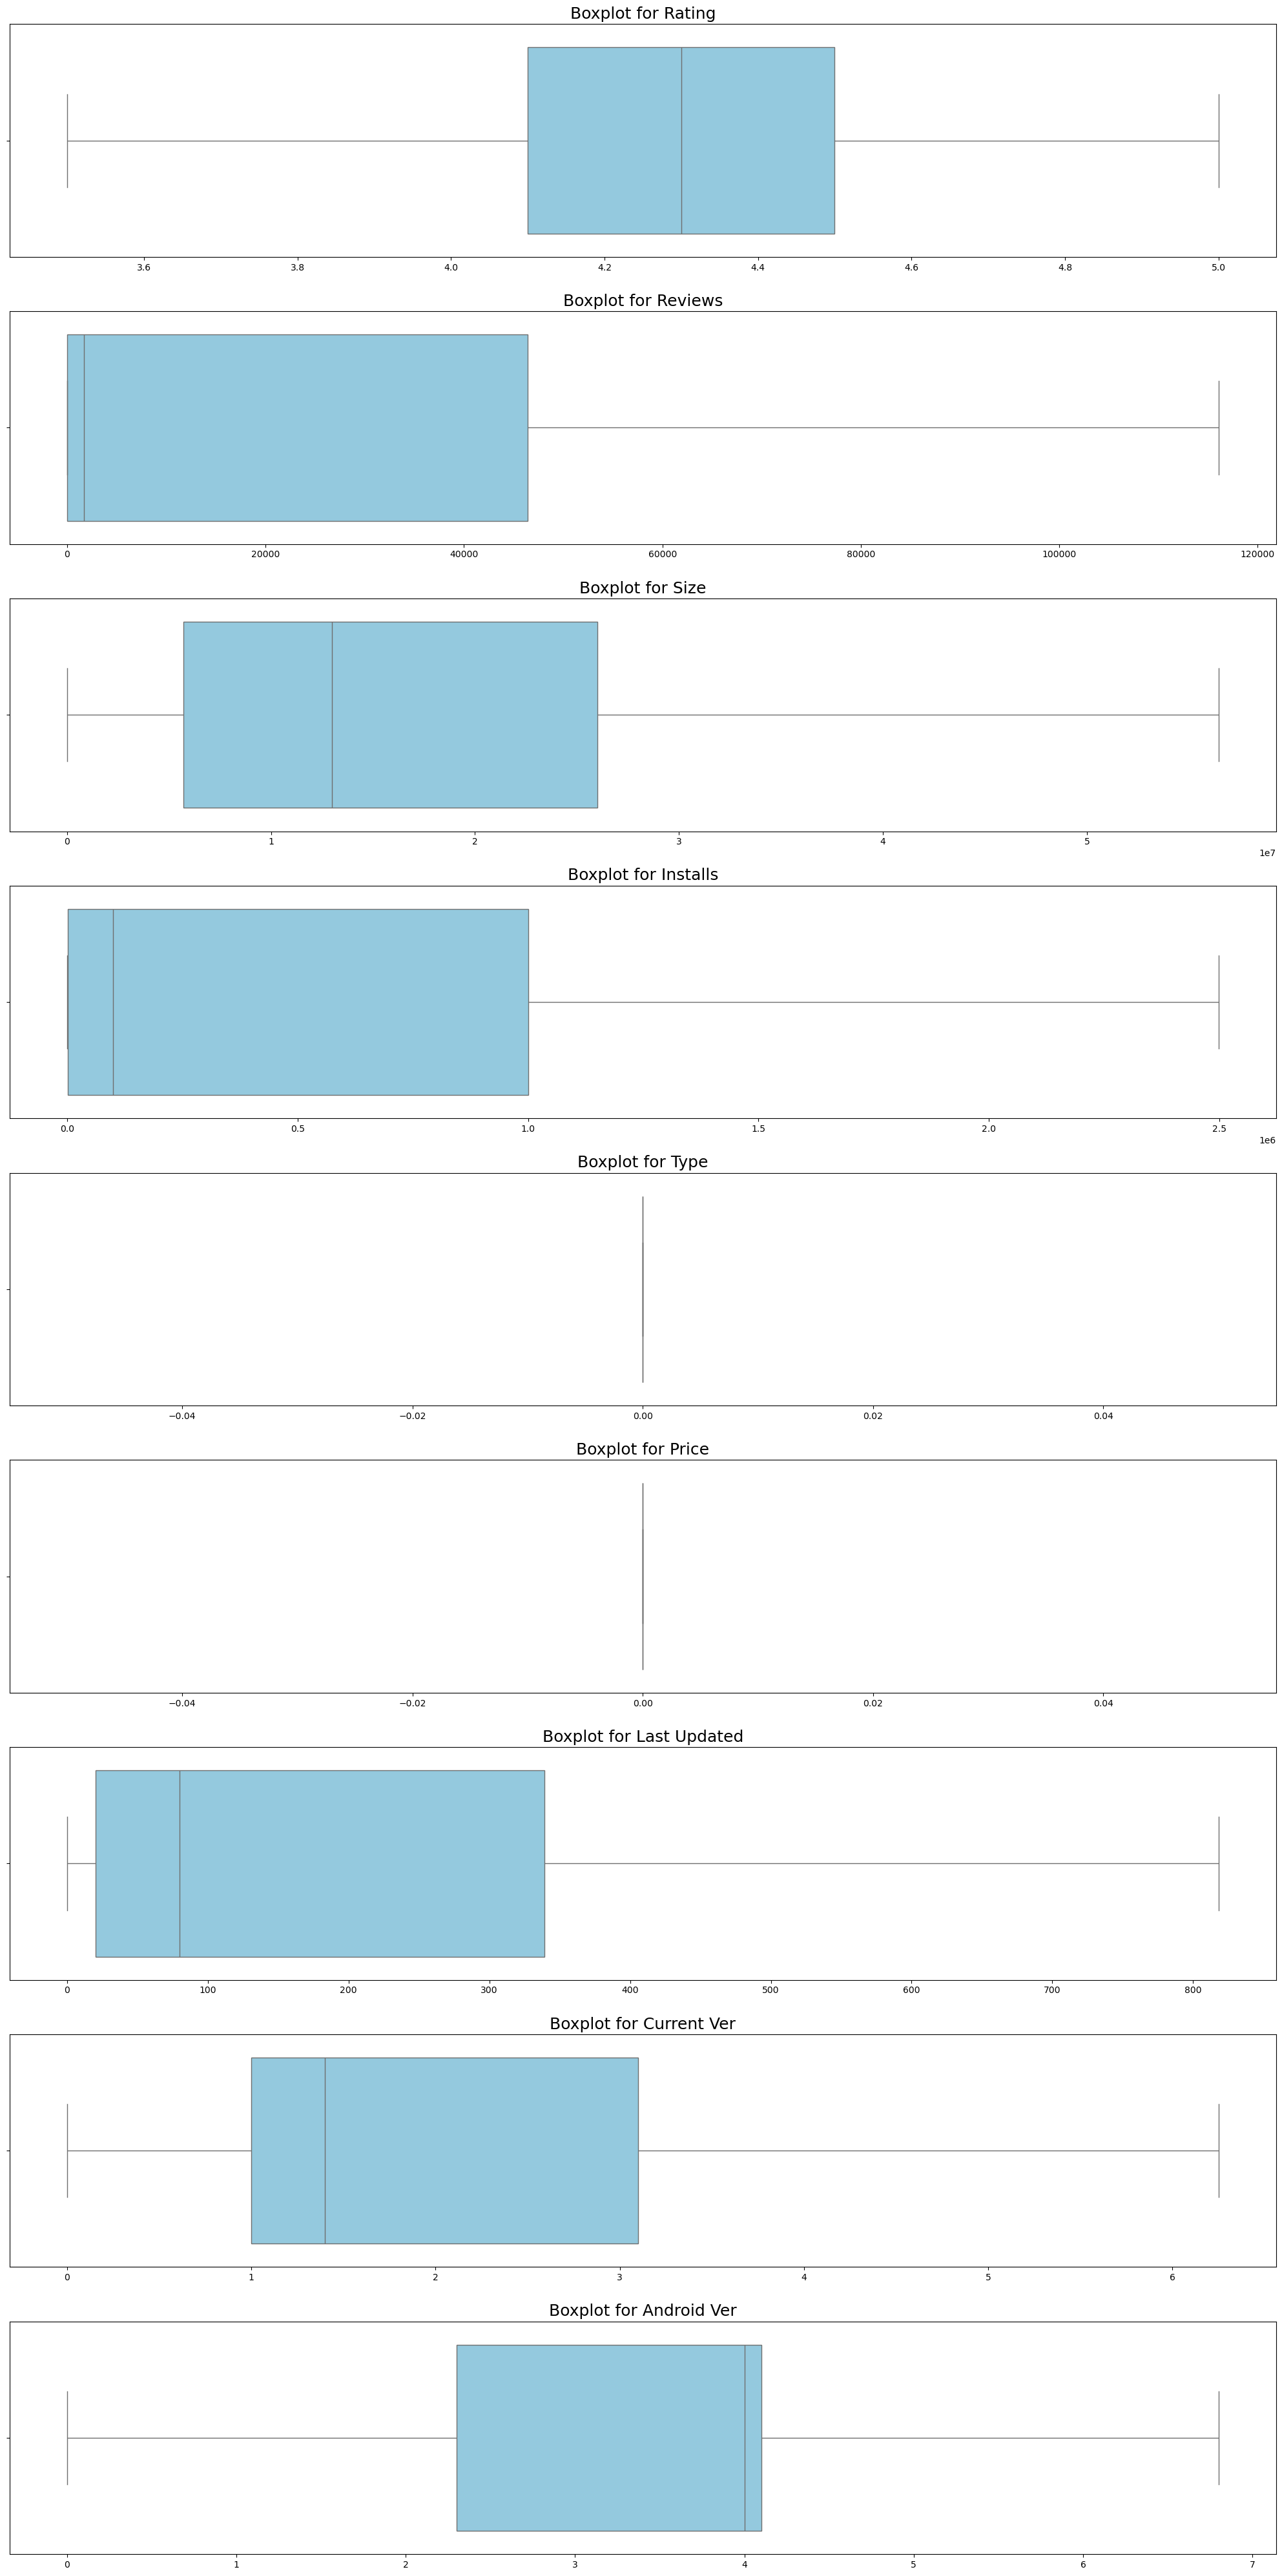

In [42]:
# Plotting the boxplot for the entire dataset
numeric_columns = data.select_dtypes(include='number').columns

plt.figure(figsize=(20, 40))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}', fontsize=18)
    plt.xlabel('')
plt.tight_layout()
plt.show()

data = data.drop(['App'], axis=1, inplace=True)

In [67]:

print(data)

       Category  Rating     Reviews        Size   Installs  Type  Price  \
0             0     4.1     159.000  19000000.0    10000.0   0.0    0.0   
1             0     3.9     967.000  14000000.0   500000.0   0.0    0.0   
2             0     4.7   87510.000   8700000.0  2498500.0   0.0    0.0   
3             0     4.5  116047.625  25000000.0  2498500.0   0.0    0.0   
4             0     4.3     967.000   2800000.0   100000.0   0.0    0.0   
...         ...     ...         ...         ...        ...   ...    ...   
10836        11     4.5      38.000  53000000.0     5000.0   0.0    0.0   
10837        11     5.0       4.000   3600000.0      100.0   0.0    0.0   
10838        20     4.3       3.000   9500000.0     1000.0   0.0    0.0   
10839         3     4.5     114.000  13000000.0     1000.0   0.0    0.0   
10840        18     4.5  116047.625  19000000.0  2498500.0   0.0    0.0   

       Content_Rating  Genres  Last Updated  Current Ver  Android Ver  
0                   1      

In [44]:
from sklearn.preprocessing import LabelEncoder

# Identify all categorical columns
categorical_cols = data.select_dtypes(include=["object"]).columns

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

print("Label encoding completed for all categorical columns!")


Label encoding completed for all categorical columns!


In [45]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target (assuming 'Rating' is your target)
X =data.drop(columns=["Rating","Installs"])  
y =data["Rating"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling completed successfully!")


Scaling completed successfully!


In [66]:
X

,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,159.000,19000000.0,0.0,0.0,1,9,213.000,1.00,4.0
1,0,967.000,14000000.0,0.0,0.0,1,12,205.000,2.00,4.0
2,0,87510.000,8700000.0,0.0,0.0,1,9,7.000,1.20,4.0
3,0,116047.625,25000000.0,0.0,0.0,4,9,61.000,0.00,4.2
4,0,967.000,2800000.0,0.0,0.0,1,11,49.000,1.10,4.4
...,...,...,...,...,...,...,...,...,...,...
10836,11,38.000,53000000.0,0.0,0.0,1,39,379.000,1.48,4.1
10837,11,4.000,3600000.0,0.0,0.0,1,39,33.000,1.00,4.1
10838,20,3.000,9500000.0,0.0,0.0,1,71,565.000,1.00,2.2
10839,3,114.000,13000000.0,0.0,0.0,3,19,818.125,0.00,0.0


In [46]:
# Convert back to DataFrame for verification
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe())

           Category       Reviews          Size     Type    Price  \
count  1.035600e+04  1.035600e+04  1.035600e+04  10356.0  10356.0   
mean   9.331191e-17 -3.293361e-17  2.058351e-18      0.0      0.0   
std    1.000048e+00  1.000048e+00  1.000048e+00      0.0      0.0   
min   -2.003460e+00 -6.634185e-01 -1.107917e+00      0.0      0.0   
25%   -6.874666e-01 -6.627098e-01 -7.667265e-01      0.0      0.0   
50%   -3.285593e-01 -6.261461e-01 -3.291108e-01      0.0      0.0   
75%    9.874339e-01  3.650217e-01  4.502048e-01      0.0      0.0   
max    1.824884e+00  1.906619e+00  2.275602e+00      0.0      0.0   

       Content_Rating        Genres  Last Updated   Current Ver   Android Ver  
count    1.035600e+04  1.035600e+04  1.035600e+04  1.035600e+04  1.035600e+04  
mean     3.190444e-17 -2.470021e-17  5.488936e-17  5.488936e-18 -1.591791e-16  
std      1.000048e+00  1.000048e+00  1.000048e+00  1.000048e+00  1.000048e+00  
min     -1.454248e+00 -1.956133e+00 -8.161262e-01 -1.15163

In [47]:
X_scaled_df

,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,-2.003460,-0.659897,0.030573,0.0,0.0,-0.454832,-1.682217,-0.034706,-0.621937,0.410238
1,-2.003460,-0.642003,-0.269163,0.0,0.0,-0.454832,-1.590912,-0.064055,-0.092241,0.410238
2,-2.003460,1.274613,-0.586884,0.0,0.0,-0.454832,-1.682217,-0.790446,-0.515998,0.410238
3,-2.003460,1.906619,0.390257,0.0,0.0,2.543414,-1.682217,-0.592339,-1.151633,0.546327
4,-2.003460,-0.642003,-0.940574,0.0,0.0,-0.454832,-1.621347,-0.636363,-0.568967,0.682416
...,...,...,...,...,...,...,...,...,...,...
10351,-0.687467,-0.662577,2.068783,0.0,0.0,-0.454832,-0.769163,0.574288,-0.367683,0.478283
10352,-0.687467,-0.663330,-0.892616,0.0,0.0,-0.454832,-0.769163,-0.695061,-0.621937,0.478283
10353,0.389255,-0.663352,-0.538927,0.0,0.0,-0.454832,0.204761,1.256654,-0.621937,-0.814563
10354,-1.644553,-0.660894,-0.329111,0.0,0.0,1.543998,-1.377866,2.185278,-1.151633,-2.311543


In [48]:
from sklearn.model_selection import train_test_split

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X

,Category,Reviews,Size,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,159.000,19000000.0,0.0,0.0,1,9,213.000,1.00,4.0
1,0,967.000,14000000.0,0.0,0.0,1,12,205.000,2.00,4.0
2,0,87510.000,8700000.0,0.0,0.0,1,9,7.000,1.20,4.0
3,0,116047.625,25000000.0,0.0,0.0,4,9,61.000,0.00,4.2
4,0,967.000,2800000.0,0.0,0.0,1,11,49.000,1.10,4.4
...,...,...,...,...,...,...,...,...,...,...
10836,11,38.000,53000000.0,0.0,0.0,1,39,379.000,1.48,4.1
10837,11,4.000,3600000.0,0.0,0.0,1,39,33.000,1.00,4.1
10838,20,3.000,9500000.0,0.0,0.0,1,71,565.000,1.00,2.2
10839,3,114.000,13000000.0,0.0,0.0,3,19,818.125,0.00,0.0


In [50]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10356, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

print("🔹 Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

🔹 Linear Regression
MSE: 0.12403232269893019
R2 Score: 0.0633426628567556


In [52]:
from sklearn.ensemble import RandomForestRegressor

# 2. Training the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Predictions
y_pred = model.predict(X_test)

# 4. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🚀 Model Training Completed!")
print(f"📝 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔗 R-squared (R2 Score): {r2:.4f}")


🚀 Model Training Completed!
📝 Mean Squared Error (MSE): 0.1142
🔗 R-squared (R2 Score): 0.1379


In [55]:
from sklearn.svm import SVR

# 3. Model Training
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# 4. Model Predictions
y_pred = svr_model.predict(X_test)

# 5. Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🚀 Model Training Completed!")
print(f"📝 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔗 R-squared (R2 Score): {r2:.4f}")


🚀 Model Training Completed!
📝 Mean Squared Error (MSE): 0.1295
🔗 R-squared (R2 Score): 0.0219


In [56]:
from sklearn.naive_bayes import GaussianNB

# 2. Bin the continuous target into discrete categories
bins = [0, 2, 3, 4, 5]  # Adjust based on your rating distribution
labels = [0, 1, 2, 3]  # Encode the bins
y_binned = np.digitize(y, bins) - 1  # -1 to match label range

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_binned, test_size=0.2, random_state=42)

# 4. Model Training
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Model Predictions
y_pred = nb_model.predict(X_test)

# 6. Map back to original ratings
y_pred_continuous = np.array([bins[label] for label in y_pred])
y_test_continuous = np.array([bins[label] for label in y_test])

# 7. Model Evaluation
mse = mean_squared_error(y_test_continuous, y_pred_continuous)
r2 = r2_score(y_test_continuous, y_pred_continuous)

print("\n🚀 Model Training Completed!")
print(f"📝 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔗 R-squared (R2 Score): {r2:.4f}")



🚀 Model Training Completed!
📝 Mean Squared Error (MSE): 0.5734
🔗 R-squared (R2 Score): -1.9536


In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 2. Bin the continuous target into discrete categories
bins = [0, 2, 3, 4, 5]  # Adjust based on your rating distribution
labels = [0, 1, 2, 3]  # Encode the bins
y_binned = np.digitize(y, bins) - 1  # -1 to match label range

# 2. Bin the continuous target into discrete categories (round to nearest integer for simplicity)
y_binned = np.round(y).astype(int)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_binned, test_size=0.2, random_state=42)

# 4. Model Training
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 5. Model Predictions
y_pred = nb_model.predict(X_test)

# 6. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n🚀 Model Training Completed!")
print(f"🔗 Accuracy: {accuracy:.4f}")
print("\n📝 Classification Report:\n", report)
print("\n🔄 Confusion Matrix:\n", conf_matrix)


🚀 Model Training Completed!
🔗 Accuracy: 0.7099

📝 Classification Report:
               precision    recall  f1-score   support

           3       0.14      0.17      0.15       137
           4       0.76      0.92      0.83      1567
           5       0.00      0.00      0.00       368

    accuracy                           0.71      2072
   macro avg       0.30      0.36      0.33      2072
weighted avg       0.58      0.71      0.64      2072


🔄 Confusion Matrix:
 [[  23  114    0]
 [ 119 1448    0]
 [  23  345    0]]


In [58]:
from sklearn.ensemble import RandomForestClassifier

# 1. Model Training
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# 2. Model Predictions
y_pred_rf = rf_model.predict(X_test)

# 3. Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("\n🚀 Random Forest Model:")
print(f"🔗 Accuracy: {accuracy_rf:.4f}")
print("\n📝 Classification Report:\n", report_rf)
print("\n🔄 Confusion Matrix:\n", conf_matrix_rf)



🚀 Random Forest Model:
🔗 Accuracy: 0.7664

📝 Classification Report:
               precision    recall  f1-score   support

           3       0.38      0.04      0.08       137
           4       0.78      0.97      0.86      1567
           5       0.60      0.18      0.27       368

    accuracy                           0.77      2072
   macro avg       0.58      0.40      0.40      2072
weighted avg       0.72      0.77      0.71      2072


🔄 Confusion Matrix:
 [[   6  130    1]
 [   7 1517   43]
 [   3  300   65]]


In [59]:
from sklearn.svm import SVC

# 1. Model Training
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# 2. Model Predictions
y_pred_svm = svm_model.predict(X_test)

# 3. Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("\n🚀 SVM Model:")
print(f"🔗 Accuracy: {accuracy_svm:.4f}")
print("\n📝 Classification Report:\n", report_svm)
print("\n🔄 Confusion Matrix:\n", conf_matrix_svm)



🚀 SVM Model:
🔗 Accuracy: 0.7563

📝 Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       137
           4       0.76      1.00      0.86      1567
           5       0.00      0.00      0.00       368

    accuracy                           0.76      2072
   macro avg       0.25      0.33      0.29      2072
weighted avg       0.57      0.76      0.65      2072


🔄 Confusion Matrix:
 [[   0  137    0]
 [   0 1567    0]
 [   0  368    0]]


In [61]:
from sklearn.linear_model import LogisticRegression

# 1. Model Training
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# 2. Model Predictions
y_pred_lr = lr_model.predict(X_test)

# 3. Model Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("\n🚀 Logistic Regression Model:")
print(f"🔗 Accuracy: {accuracy_lr:.4f}")
print("\n📝 Classification Report:\n", report_lr)
print("\n🔄 Confusion Matrix:\n", conf_matrix_lr)



🚀 Logistic Regression Model:
🔗 Accuracy: 0.7563

📝 Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       137
           4       0.76      1.00      0.86      1567
           5       0.00      0.00      0.00       368

    accuracy                           0.76      2072
   macro avg       0.25      0.33      0.29      2072
weighted avg       0.57      0.76      0.65      2072


🔄 Confusion Matrix:
 [[   0  137    0]
 [   0 1567    0]
 [   0  368    0]]


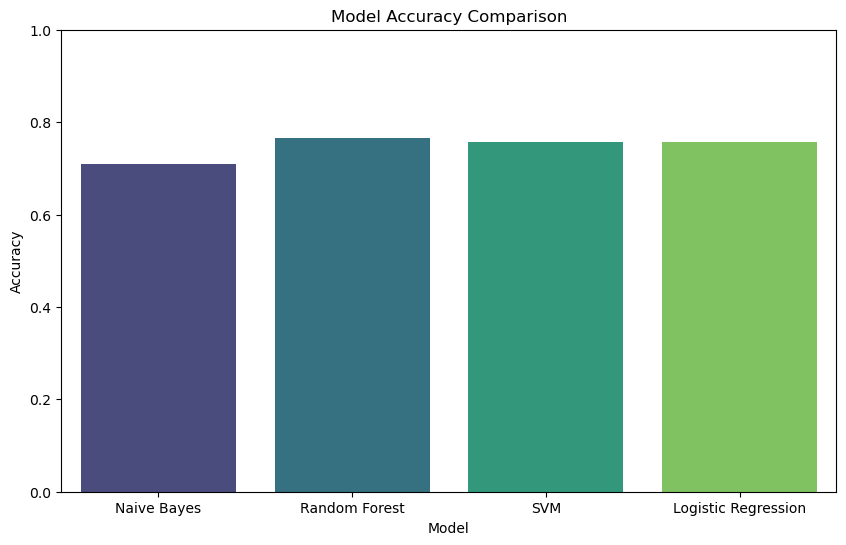

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Store the model names and their accuracies
model_names = ["Naive Bayes", "Random Forest", "SVM", "Logistic Regression"]
accuracies = [accuracy, accuracy_rf, accuracy_svm, accuracy_lr]

# Create a DataFrame for better visualization
import pandas as pd
accuracy_df = pd.DataFrame({"Model": model_names, "Accuracy": accuracies})

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()


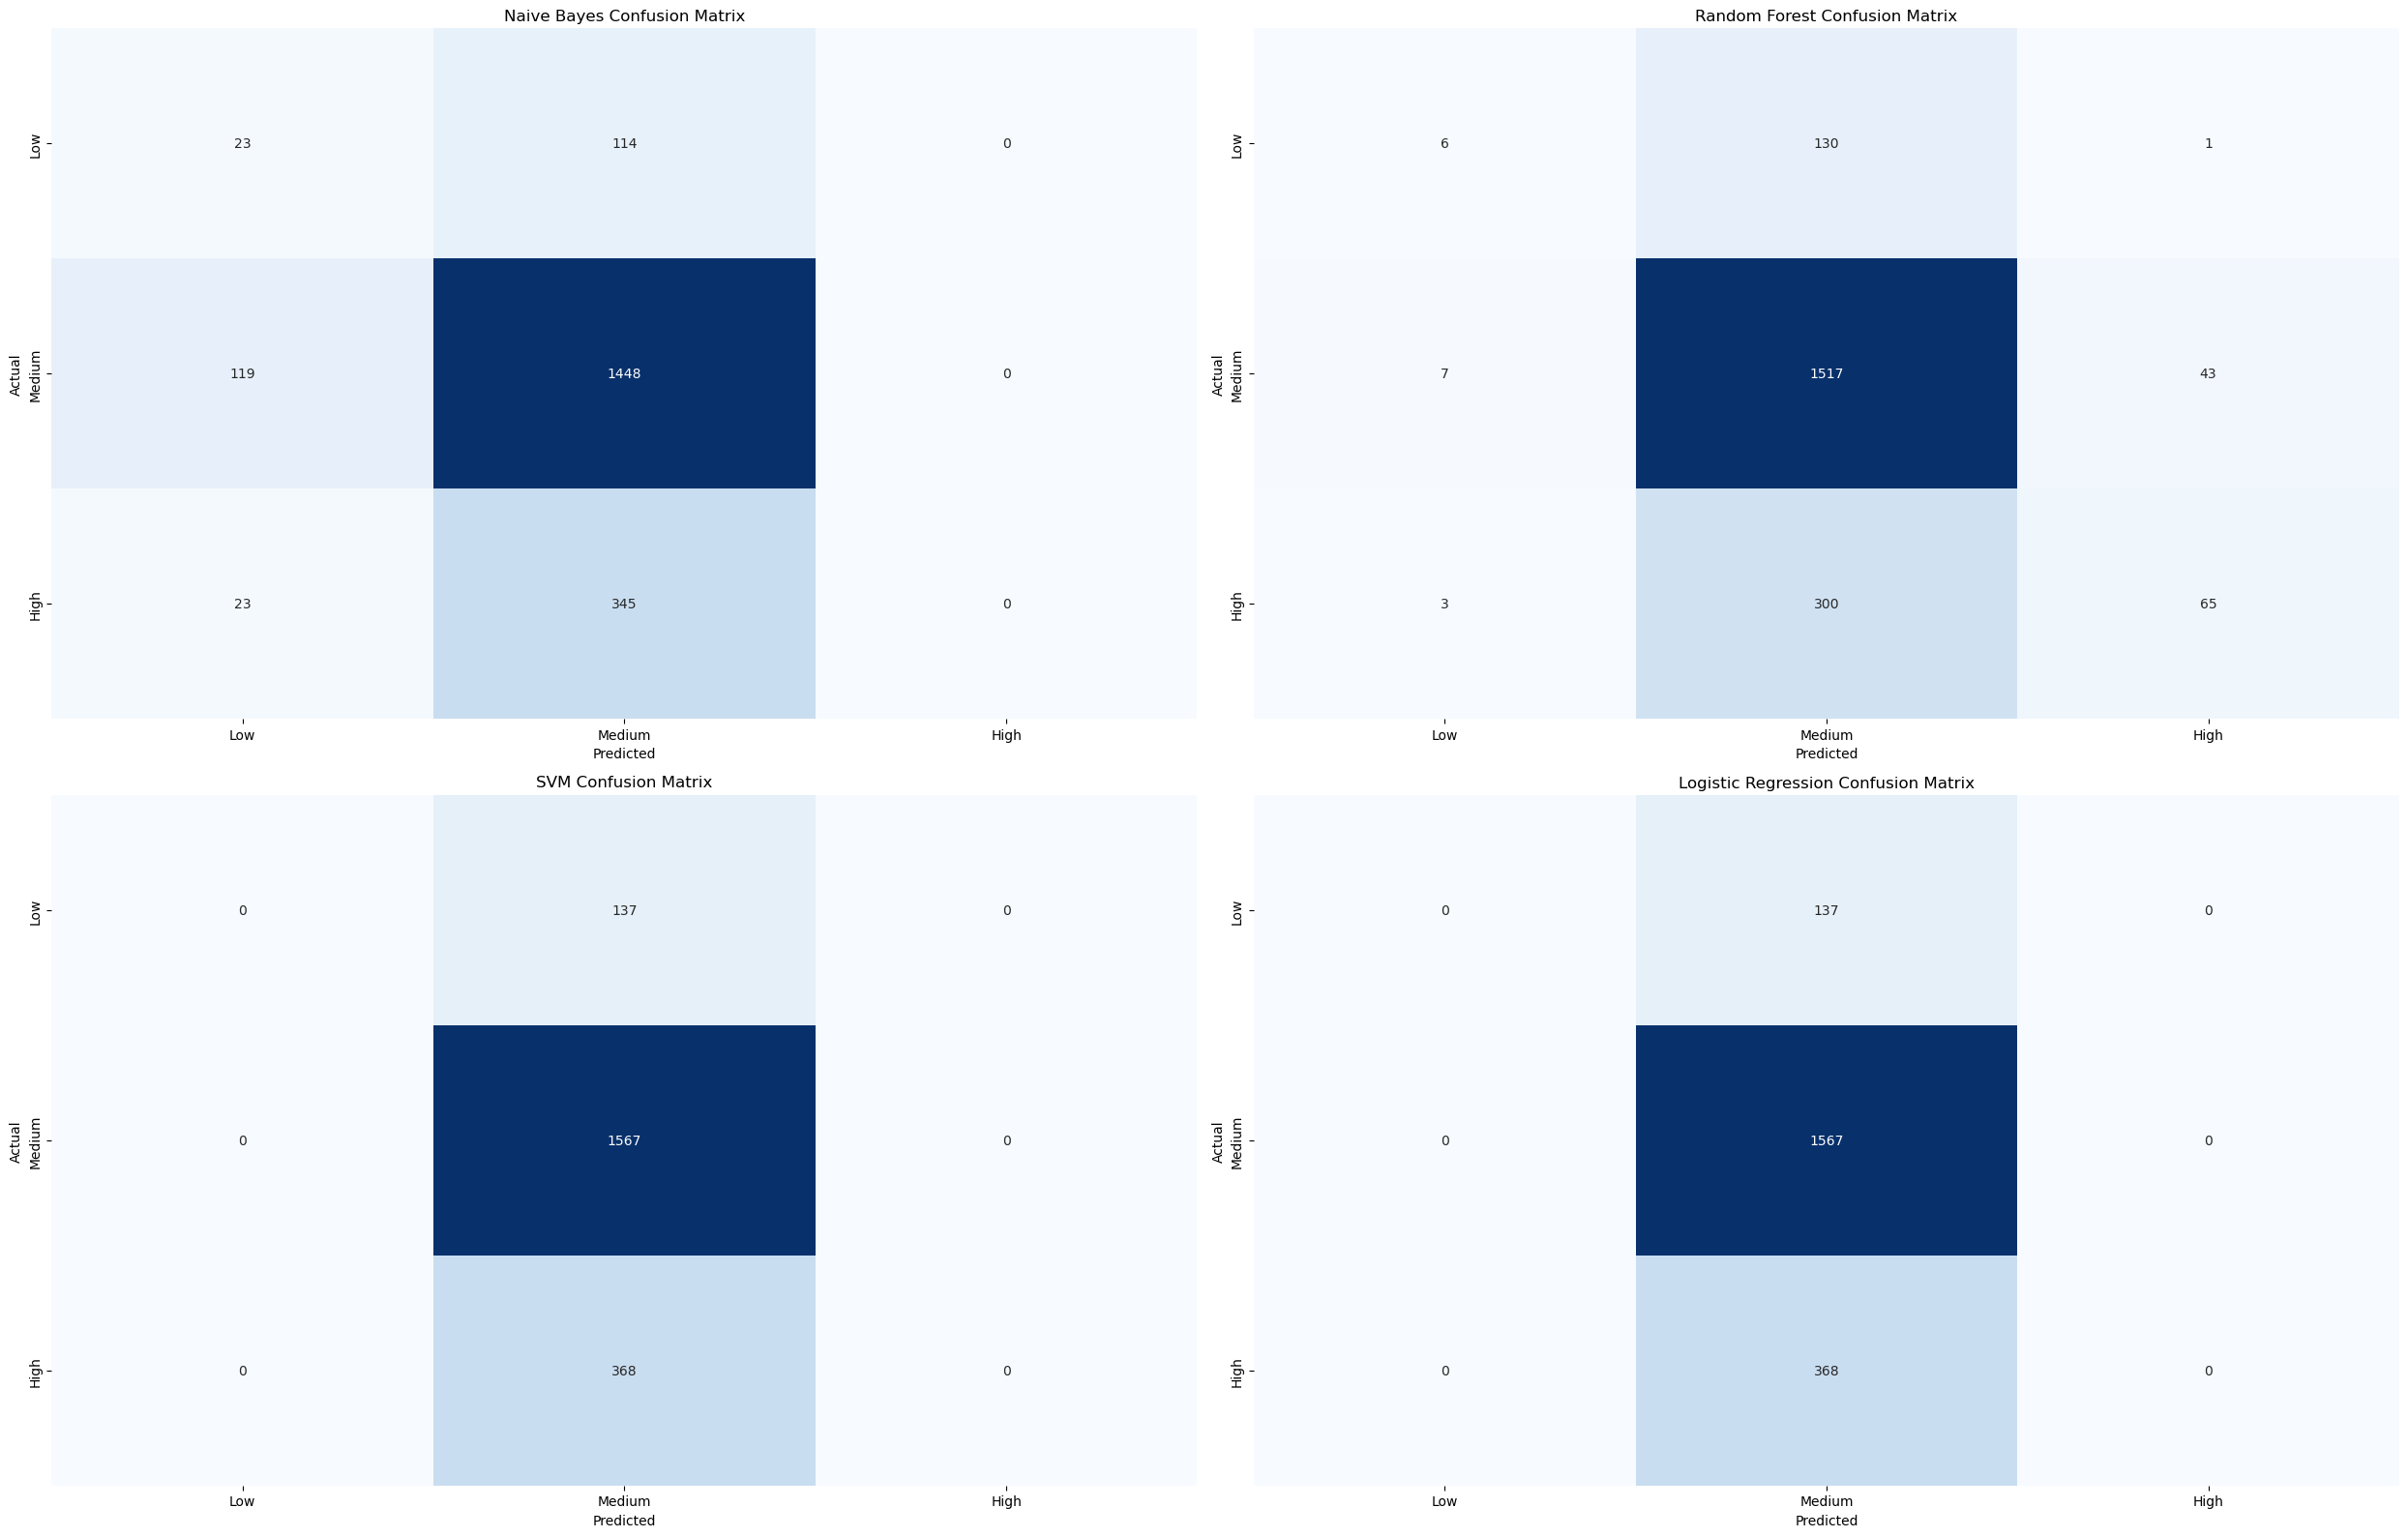

In [63]:


# List of models and their predicted labels
models = ["Naive Bayes", "Random Forest", "SVM", "Logistic Regression"]
predictions = [y_pred, y_pred_rf, y_pred_svm, y_pred_lr]
conf_matrices = [conf_matrix, conf_matrix_rf, conf_matrix_svm, conf_matrix_lr]

plt.figure(figsize=(25, 16))

for i, (model, cm) in enumerate(zip(models, conf_matrices)):
    plt.subplot(2, 2, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Low", "Medium", "High"],
                yticklabels=["Low", "Medium", "High"])
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [64]:
import joblib

# Assuming Random Forest is your best model (replace with the actual best model)
model = RandomForestClassifier  # Replace with the best model variable
model_filename = "model.pkl"

# Save the model
joblib.dump(model, model_filename)

print(f"✅ Best model saved as '{model_filename}'")


✅ Best model saved as 'model.pkl'
